# Recognizing Handwritten Digits with scikit-learn


# Load Dataset

In [1]:
from sklearn import datasets
digits = datasets.load_digits()

# Full descripton of datasets

In [2]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [3]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

# Shape of the dataset

In [5]:
digits.data.shape

(1797, 64)

# Images stored in the form of array

The images of the handwritten digits are contained in a digits.images array. Each element of this array is an image that is represented by an 8x8 matrix of numerical values that correspond to a grayscale from white, with a value of 0, to black, with the value 15

In [6]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

The images of the handwritten digits are contained in a digits.images array

# Visualizing an array

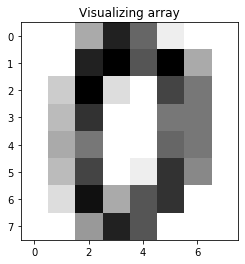

In [7]:
import matplotlib.pyplot as plt
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')
plt.title('Visualizing array')
#save the figure
plt.savefig('plot2.png', dpi=100, bbox_inches='tight')

# Visualization of digits

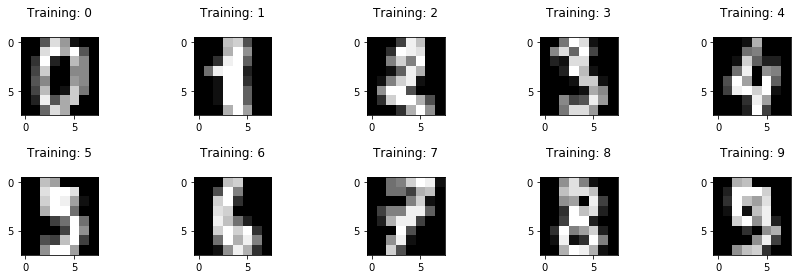

In [8]:
import numpy as np
plt.figure(figsize=(15,4))
plt.subplots_adjust(hspace=0.8)
for index, (image, label) in enumerate(zip(digits.data[0:10], digits.target[0:10])):
    plt.subplot(2, 5, index+1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize =12)
    
#save the figure
plt.savefig('plot1.png', dpi=300, bbox_inches='tight')

# Split the dataset

# Size of the training set

It was reported that the dataset is a training set consisting of 1,797 images. we can determine if that is true.

In [9]:
digits.target.size

1797

In [11]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [12]:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.2, random_state=0)

# Training and Prediction

# 1. Support Vector Classifier 

In [13]:
from sklearn import svm
svc = svm.SVC(gamma=0.001, C=100.)

In [14]:
svc.fit(x_train, y_train)

SVC(C=100.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [15]:
y_pred = svc.predict(x_test)

# 4 test samples and their predicted digit value

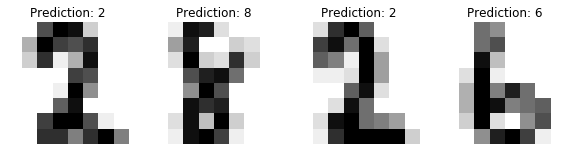

In [16]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, x_test, y_pred):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')
    
# save the figure
plt.savefig('plot7.png', dpi=300, bbox_inches='tight')

In [17]:
score = svc.score(x_test, y_test)
print('Accuracy Score: {0}'.format(score))

Accuracy Score: 0.9916666666666667


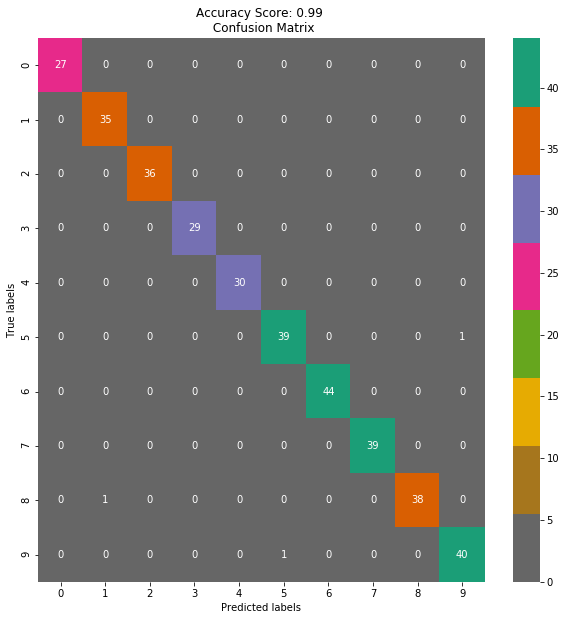

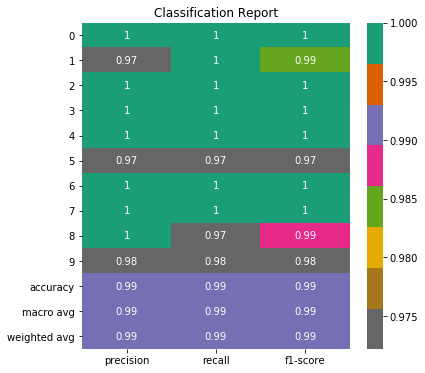

In [18]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import seaborn as sns
import pandas as pd
labels=['0','1','2', '3','4','5','6','7','8','9']
f, ax = plt.subplots(figsize=(10,10))
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True,ax=ax,cmap="Dark2_r")
#labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Accuracy Score: {0} \n Confusion Matrix'.format(np.round(score,2)))
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.savefig('plot3.png', dpi=300, bbox_inches='tight')
plt.show()
f, ax = plt.subplots(figsize=(6,6))
class_report=classification_report(y_test,y_pred,target_names=labels, output_dict=True)
sns.heatmap(pd.DataFrame(class_report).iloc[:-1, :].T, annot=True,ax=ax,cmap="Dark2_r")
ax.set_title('Classification Report')
plt.savefig('plot4.png', dpi=300, bbox_inches='tight')
plt.show()

# 2. Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()

In [20]:
import warnings 
warnings.filterwarnings("ignore")
logisticRegr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
y_pred=logisticRegr.predict(x_test)

In [22]:
# Use score method to get accuracy of model
score = logisticRegr.score(x_test, y_test)
print('Accuracy Score: {0}'.format(score))

Accuracy Score: 0.9666666666666667


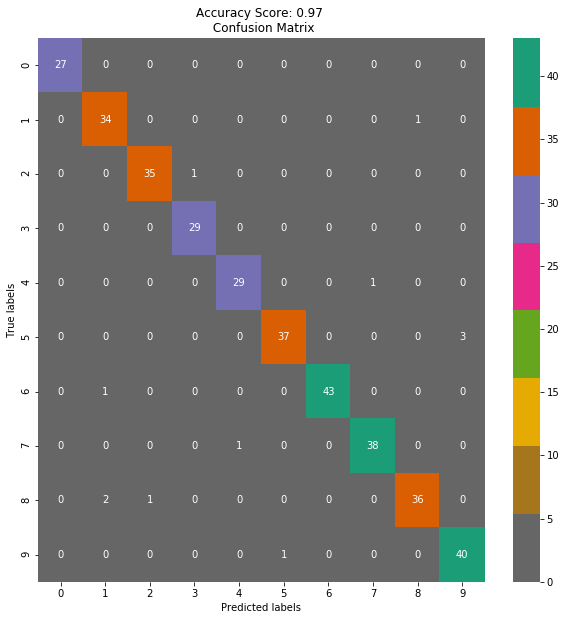

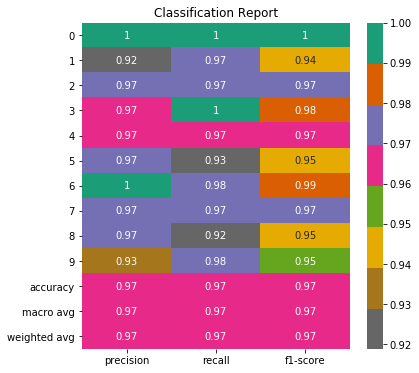

In [23]:

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import seaborn as sns
import pandas as pd
labels=['0','1','2', '3','4','5','6','7','8','9']
f, ax = plt.subplots(figsize=(10,10))
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True,ax=ax,cmap="Dark2_r")
#labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Accuracy Score: {0} \n Confusion Matrix'.format(np.round(score,2)))
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.savefig('plot5.png', dpi=300, bbox_inches='tight')
plt.show()
f, ax = plt.subplots(figsize=(6,6))
class_report=classification_report(y_test,y_pred,target_names=labels, output_dict=True)
sns.heatmap(pd.DataFrame(class_report).iloc[:-1, :].T, annot=True,ax=ax,cmap="Dark2_r")
ax.set_title('Classification Report')
plt.savefig('plot6.png', dpi=300, bbox_inches='tight')
plt.show()

# 3. Decision Tree Classifier

In [24]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'gini')

In [25]:

dt.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [26]:
y_pred=dt.predict(x_test)

In [27]:
# Use score method to get accuracy of model
score = dt.score(x_test, y_test)
print('Accuracy Score: {0}'.format(score))

Accuracy Score: 0.85


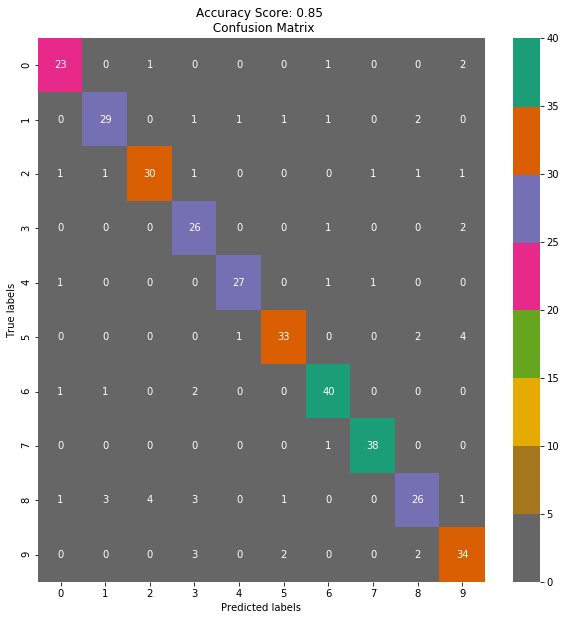

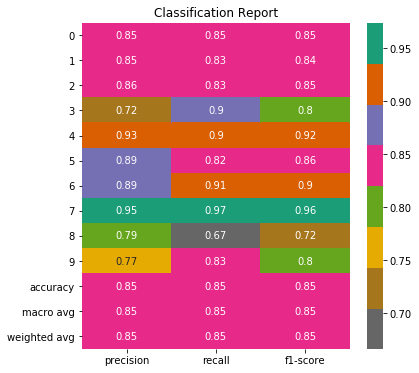

In [28]:

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import seaborn as sns
import pandas as pd
labels=['0','1','2', '3','4','5','6','7','8','9']
f, ax = plt.subplots(figsize=(10,10))
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True,ax=ax,cmap="Dark2_r")
#labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Accuracy Score: {0} \n Confusion Matrix'.format(np.round(score,2)))
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.savefig('plot7.png', dpi=300, bbox_inches='tight')
plt.show()
f, ax = plt.subplots(figsize=(6,6))
class_report=classification_report(y_test,y_pred,target_names=labels, output_dict=True)
sns.heatmap(pd.DataFrame(class_report).iloc[:-1, :].T, annot=True,ax=ax,cmap="Dark2_r")
ax.set_title('Classification Report')
plt.savefig('plot8.png', dpi=300, bbox_inches='tight')
plt.show()

# 4.Random Forest Classifier

In [29]:
from sklearn.ensemble import RandomForestClassifier
rc = RandomForestClassifier(n_estimators = 150)

In [30]:
rc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [32]:
y_pred=rc.predict(x_test)

In [33]:
# Use score method to get accuracy of model
score = rc.score(x_test, y_test)
print('Accuracy Score: {0}'.format(score))

Accuracy Score: 0.9722222222222222


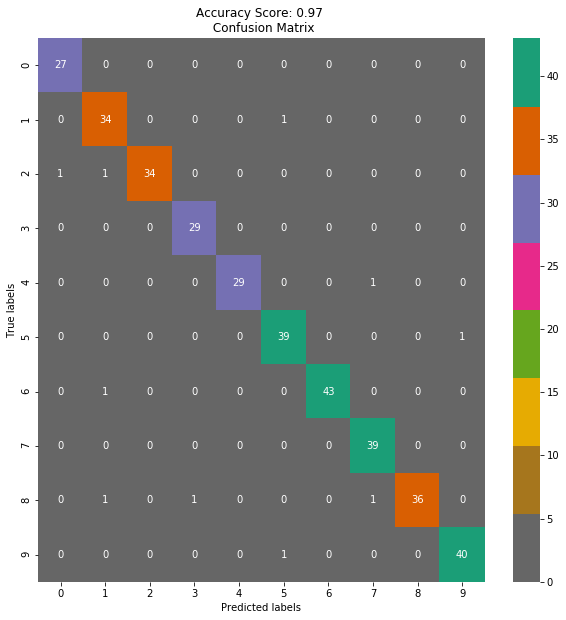

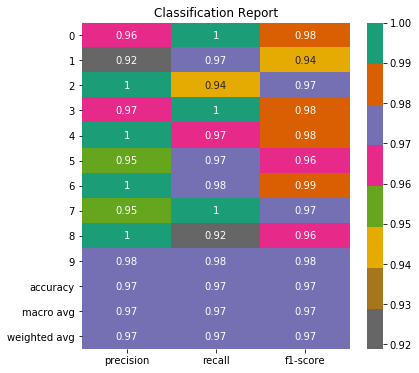

In [35]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import seaborn as sns
import pandas as pd
labels=['0','1','2', '3','4','5','6','7','8','9']
f, ax = plt.subplots(figsize=(10,10))
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True,ax=ax,cmap="Dark2_r")
#labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Accuracy Score: {0} \n Confusion Matrix'.format(np.round(score,2)))
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.savefig('plot9.png', dpi=300, bbox_inches='tight')
plt.show()
f, ax = plt.subplots(figsize=(6,6))
class_report=classification_report(y_test,y_pred,target_names=labels, output_dict=True)
sns.heatmap(pd.DataFrame(class_report).iloc[:-1, :].T, annot=True,ax=ax,cmap="Dark2_r")
ax.set_title('Classification Report')
plt.savefig('plot10.png', dpi=300, bbox_inches='tight')
plt.show()

# Conclusion:


This dataset predicts the digit accurately 95% of the times.